# Final Project 
## House Prices and Linear Regression
#### Data science immersive bootcamp
Saudi Digital Academy and Coding Dojo 
##### Yasir Alhejaili

First we need to import the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Load the data

In [2]:
df = pd.read_csv("/Users/yasseralhrbi/Desktop/Final_Project/train.csv")

Exploring the Data

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### We are intrested in Sale Price 

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### To see the distribution of the Sale Price


[Text(0.5, 0, 'Sale Price')]

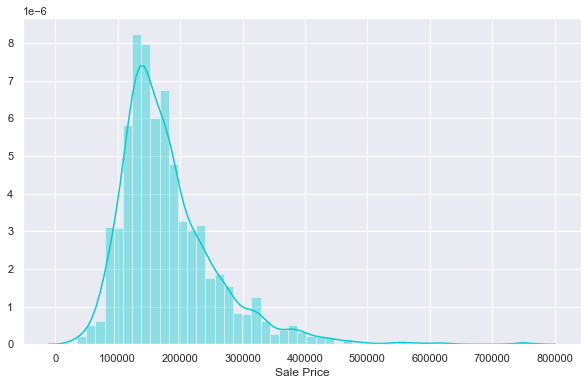

In [7]:
sns.set(rc={"figure.figsize": (10, 6)});

sns.distplot(df.SalePrice , color="darkturquoise").set(xlabel="Sale Price")

To see the max and min price and some details of the houses 

In [8]:
print("Max of Sale Price is :" , max(df.SalePrice),"$\nThe year sold is :"
      , df.loc[df["SalePrice"] == max(df.SalePrice) , "YrSold"].iloc[0] ,
      "\nThe year built is :" , df.loc[df["SalePrice"] == max(df.SalePrice) , "YearBuilt"].iloc[0])

print("=====================================================")


print("Min of Sale Price is :" , min(df.SalePrice),"$\nThe year sold is :"
      , df.loc[df["SalePrice"] == min(df.SalePrice) , "YrSold"].iloc[0] ,
      "\nThe year built is :" , df.loc[df["SalePrice"] == min(df.SalePrice) , "YearBuilt"].iloc[0])



Max of Sale Price is : 755000 $
The year sold is : 2007 
The year built is : 1994
Min of Sale Price is : 34900 $
The year sold is : 2009 
The year built is : 1920


#### Scatter plot to see the relation between "Ground living area" , "Sale Price" And "The Total Rooms"

[Text(0, 0.5, 'Sale Price'), Text(0.5, 0, 'Ground living area\n square feet')]

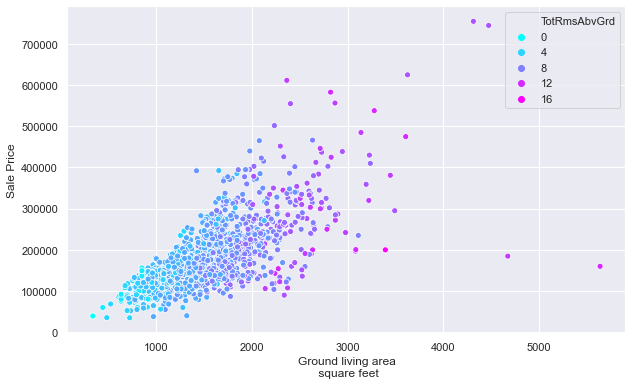

In [9]:
plt.subplots(figsize=(10, 6))
p1 = sns.scatterplot(x="GrLivArea", y="SalePrice" , data=df , hue="TotRmsAbvGrd" ,  palette="cool")
p1.set(xlabel="Ground living area\n square feet", ylabel = "Sale Price")

#### Scatter plot to see the relation between "Total Basement Area" And "Sale Price"

Text(0, 0.5, 'Sale Price')

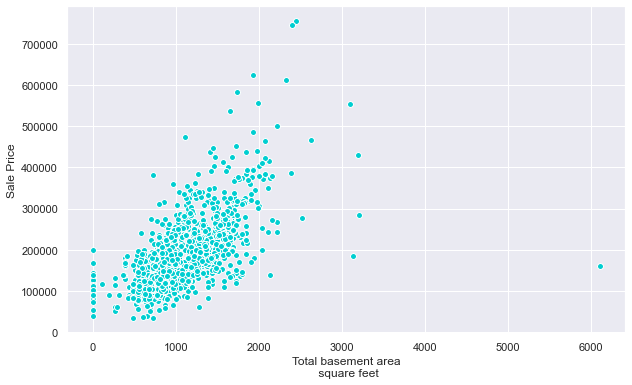

In [10]:
plt.subplots(figsize=(10, 6))
p2 = plt.scatter(x="TotalBsmtSF", y="SalePrice", data=df , c="darkturquoise" , edgecolors="white")
plt.xlabel("Total basement area\n square feet")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

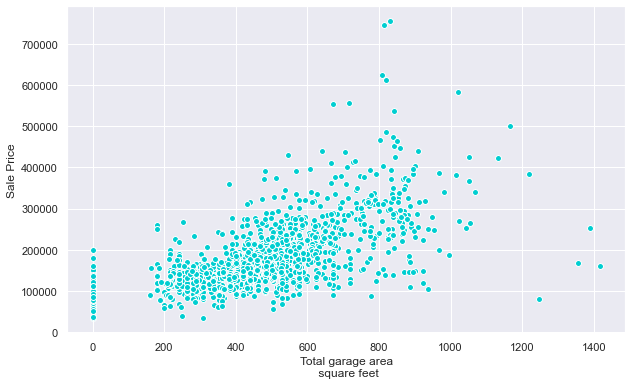

In [11]:
plt.subplots(figsize=(10, 6))
p3 = plt.scatter(x="GarageArea", y="SalePrice", data=df , c="darkturquoise" , edgecolors="white")
plt.xlabel("Total garage area\n square feet")
plt.ylabel("Sale Price")

#### Box plot to see Foundation and Sale Price

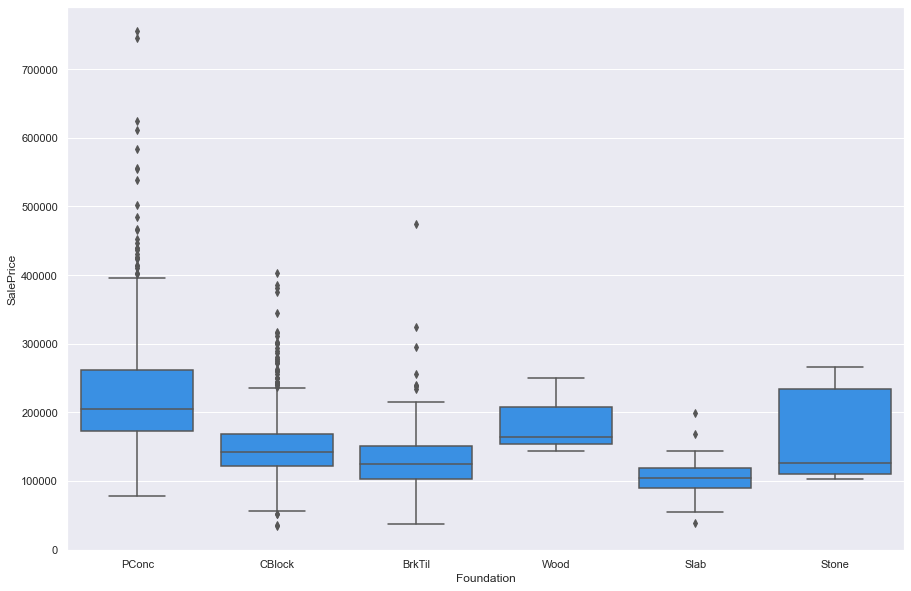

In [12]:
pd.concat([df["SalePrice"], df["YearBuilt"]], axis=1)
plt.subplots(figsize=(15, 10))
sns.boxplot(x="Foundation", y="SalePrice", data=df , color="dodgerblue")

#### Box plot to see the Overall Quality and the Sale Price

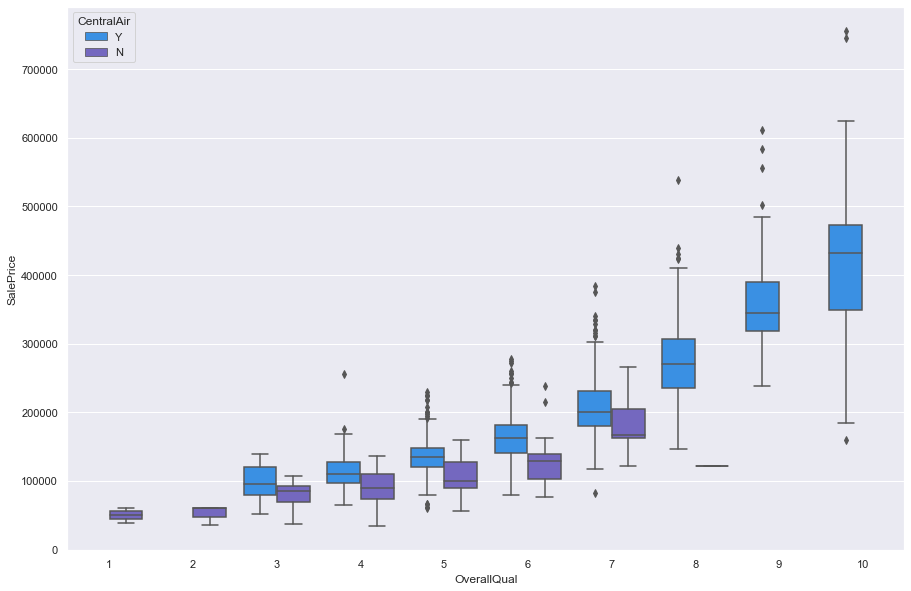

In [13]:
plt.subplots(figsize=(15, 10))
sns.boxplot(x="OverallQual", y="SalePrice", hue="CentralAir", palette=[ "dodgerblue" , "slateblue"], data=df)


Counting the months and how much solds

In [14]:
df["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

#### Count plot to see the number of solds for each month 

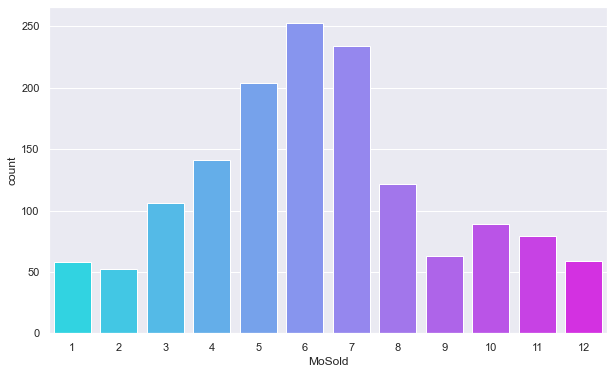

In [15]:
sns.countplot(data=df , x = "MoSold" , palette="cool")

#### correlation matrix or heatmap to see the relationships between Sale Price and other columns

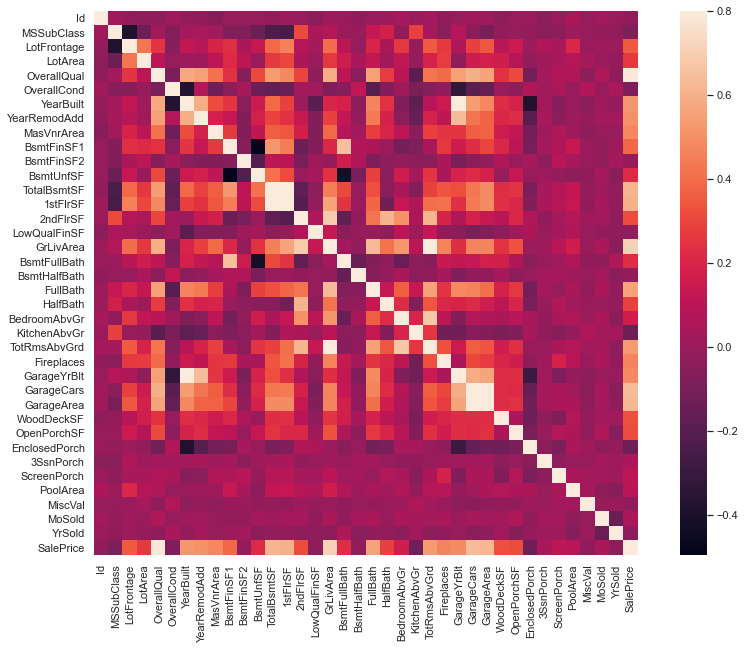

In [16]:
corr_matrix = df.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, vmax=0.8, square=True);

#### More specific heatmap to see the most correlated variables with Sale Price "Top 9 related"

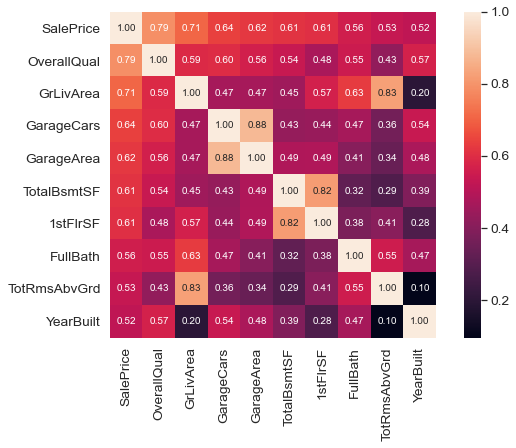

In [17]:
k = 10 
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Wide range of plots to see more information and relationships between the columns 
Reducing the heatmap from 10 variables to only 7 

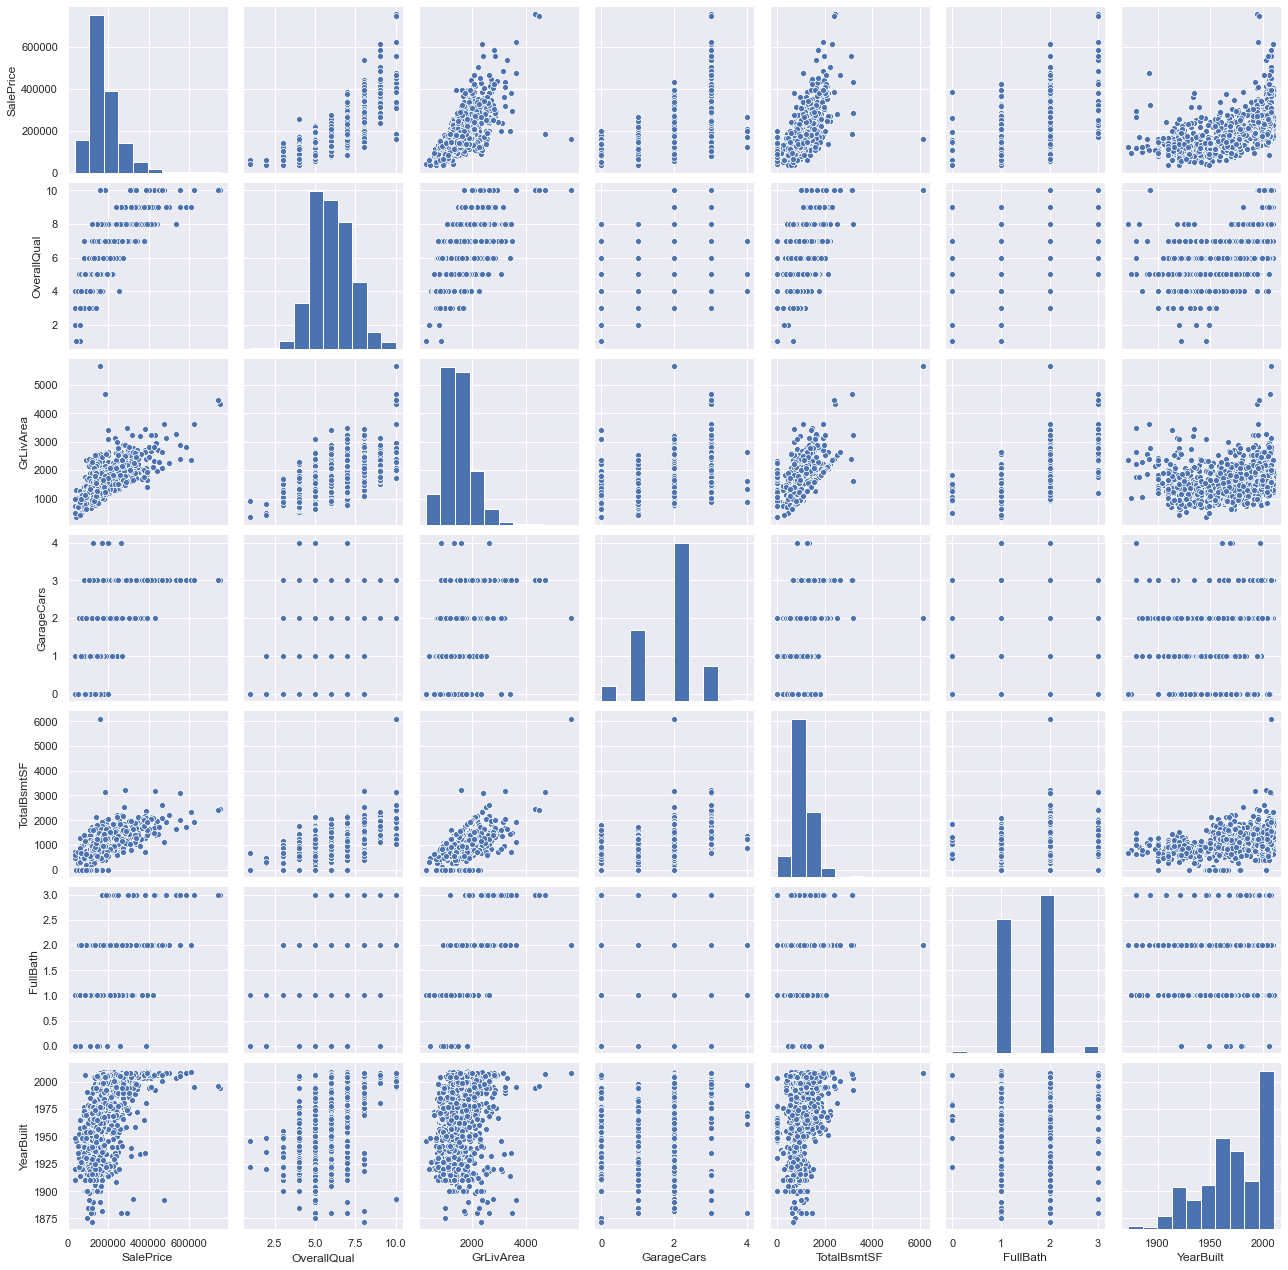

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Cleaning the data

In [19]:
missing_data = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
MD_table = pd.concat([missing_data, percent], axis=1, keys=['Total Missing Data', 'The Percent'])
MD_table.head(25)

,Total Missing Data,The Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [20]:
df.isnull().sum().max()

1453

In [21]:
df = df.drop((MD_table[MD_table['Total Missing Data'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

0

#### Split the data to Training and Testing

In [22]:
from sklearn.model_selection import train_test_split

X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y = df['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=48)

#### Importing LinearRegression from Sckit Learn 

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Fitting X_train and y_train

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

Predict the X_test

In [25]:
predictions = lr.predict(X_test)

#### Use y_test as a true value and X_test as the prediction and use regression plot from seaborn  

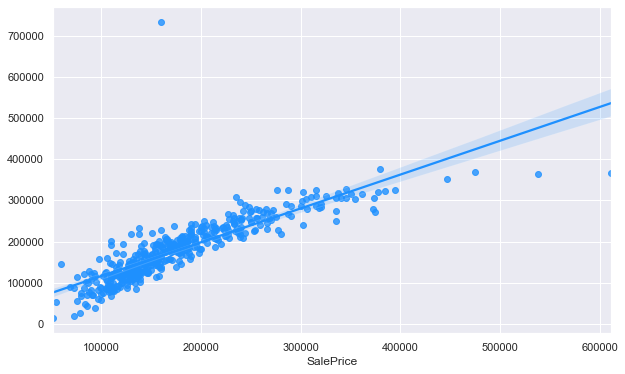

In [26]:
sns.regplot(y_test, predictions , color="dodgerblue")

#### The r2 score of the model

In [27]:
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.6781265530364988
